# Data Analysis of Import Data

In [1]:
# importng pandas and setting some default rows and columns size
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.available
plt.style.use('fast')

In [3]:
# %matplotlib notebook

In [4]:
#reading data files
df = pd.read_csv("../Data/2018-2010_import.csv")
df.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.,NaN,AFGHANISTAN TIS,2018


### Value of commodities in million US$

In [5]:
# HSCode and there description

HSDesc = df.drop_duplicates(subset ="HSCode") 
HSDesc = HSDesc.sort_values('HSCode')[['HSCode','Commodity']]
HSDesc = HSDesc.reset_index(drop = True)
HSDesc

,HSCode,Commodity
0,1,LIVE ANIMALS.
1,2,MEAT AND EDIBLE MEAT OFFAL.
2,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES."
3,4,"DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED."
4,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED."
5,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.
6,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
7,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.
8,9,"COFFEE, TEA, MATE AND SPICES."
9,10,CEREALS.


In [6]:
# Checking for the nulls
df.isna().sum()

HSCode       0    
Commodity    0    
value        14027
country      0    
year         0    
dtype: int64

### Value of some of the column is nulls, that we will handle afterwards, for now we'll ignore the null tuples 

# Now we will plot the Total sum amount of each HSCode which we import

Text(0.5, 1.0, 'Total Value of each HSCode we import')

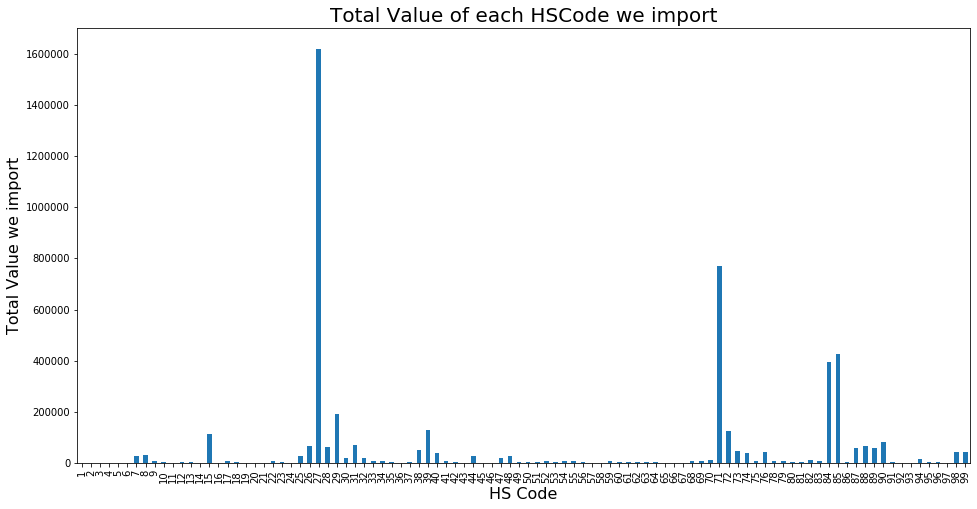

In [7]:
# showing HSCode and there import trade
df.groupby(["HSCode"]).sum()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value we import', fontsize = 16)
plt.xlabel('HS Code', fontsize = 16)
# plt.xticks(rotation=20)
plt.title('Total Value of each HSCode we import', fontsize = 20)

Text(0.5, 1.0, 'Total Value of Top 15 HSCode we import')

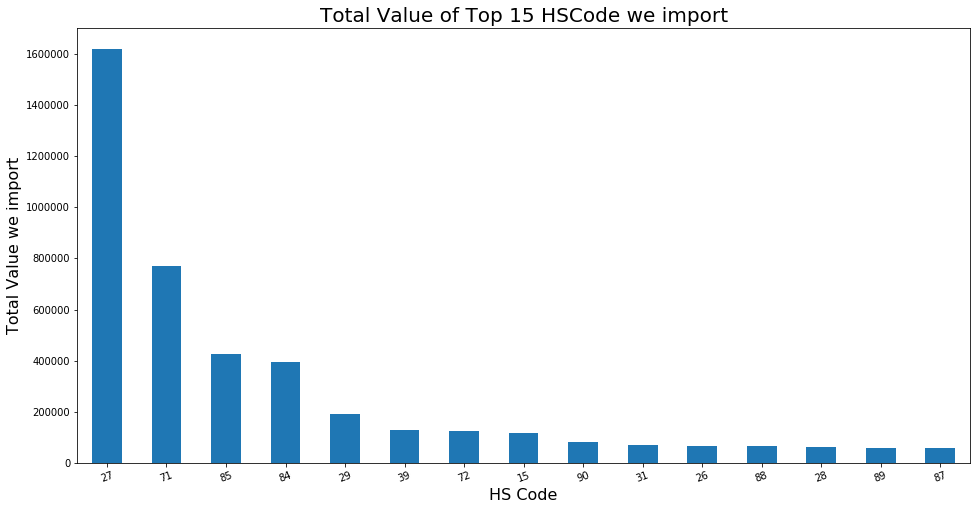

In [8]:
# top 15 HSCode import 
df.groupby(["HSCode"]).sum().nlargest(15,['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value we import', fontsize = 16)
plt.xlabel('HS Code', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total Value of Top 15 HSCode we import', fontsize = 20)

### Above HSCode Description

In [9]:
# displaying the above 15 HSCode with there descriptions for better uderstanding.
HSDesc[HSDesc['HSCode'].isin(df.groupby(["HSCode"]).sum().nlargest(15,['value']).index.values)]

,HSCode,Commodity
14,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.
25,26,"ORES, SLAG AND ASH."
26,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."
27,28,"INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES."
28,29,ORGANIC CHEMICALS
30,31,FERTILISERS.
38,39,PLASTIC AND ARTICLES THEREOF.
70,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."
71,72,IRON AND STEEL
82,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."


# For the HS Code, first 15 of the highest importing countries

### HSCode 27 - MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 27')

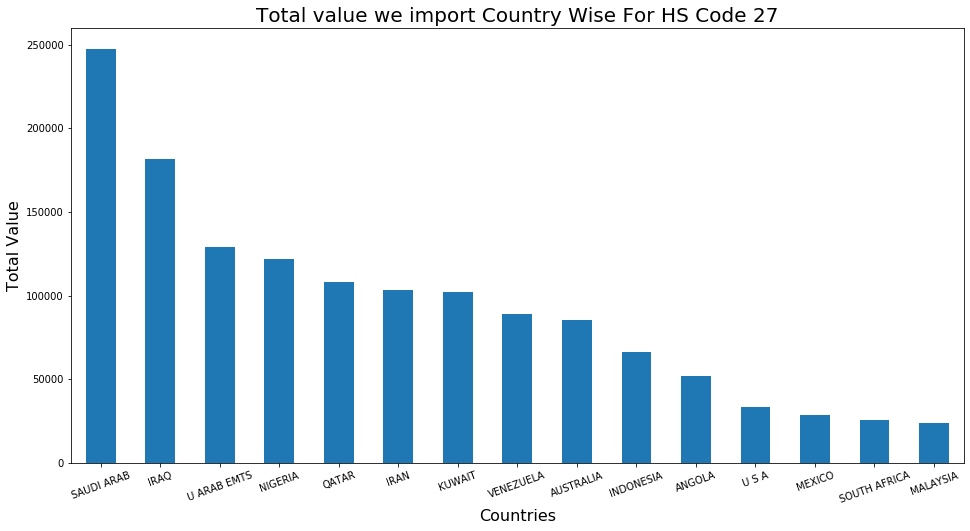

In [10]:
df[df['HSCode']==27].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 27', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 27')

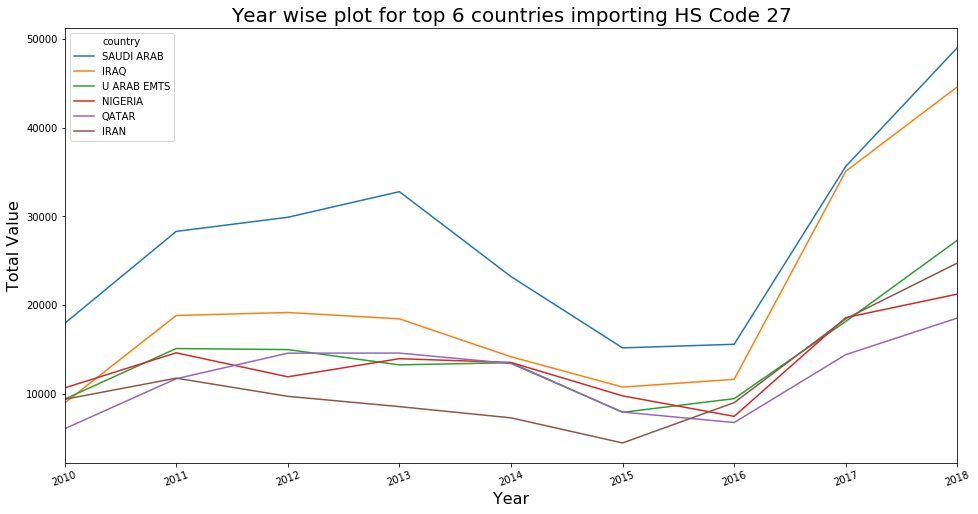

In [11]:
countries = df[df['HSCode']==27].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==27].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 27', fontsize = 20)

### HSCode 71 - NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 71')

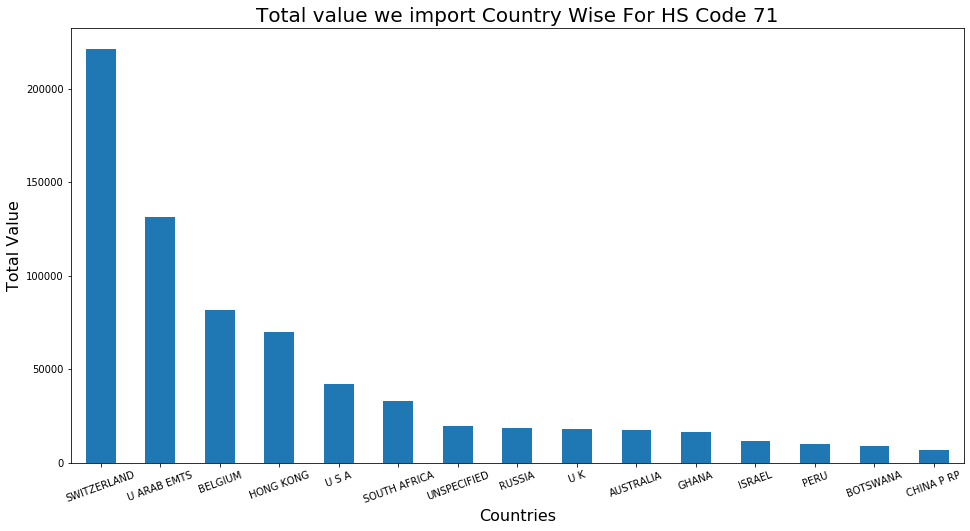

In [12]:
df[df['HSCode']==71].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 71', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 71')

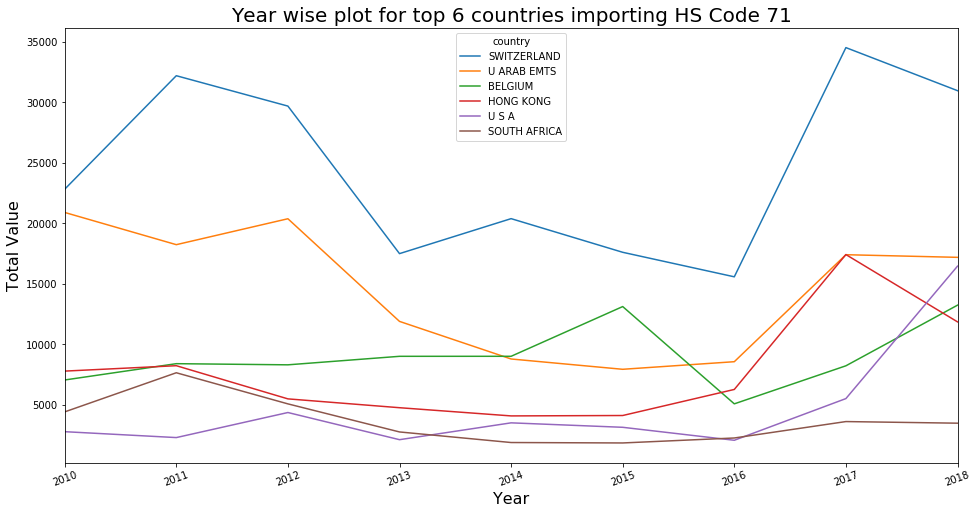

In [13]:
countries = df[df['HSCode']==71].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==71].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 71', fontsize = 20)

### HSCode 85 - ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 85')

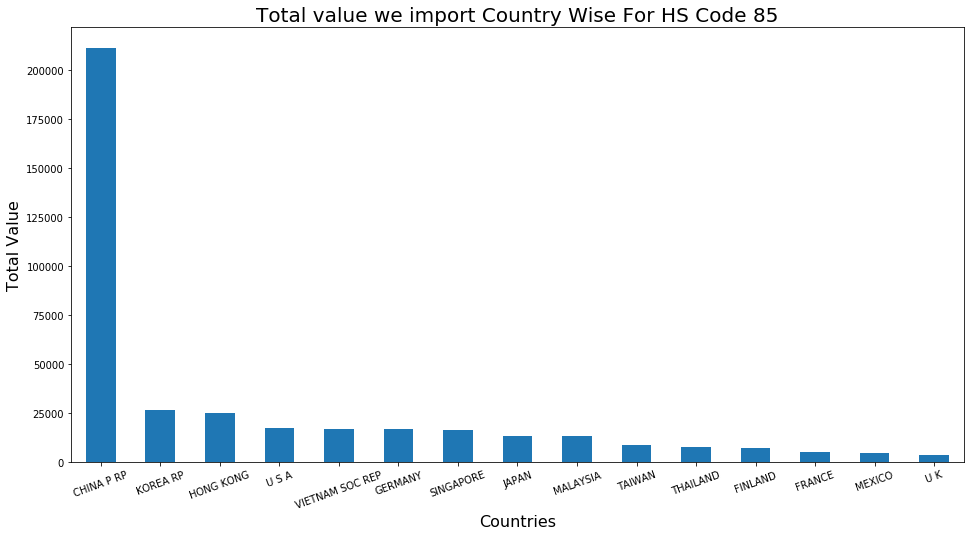

In [14]:
df[df['HSCode']==85].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 85', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 85')

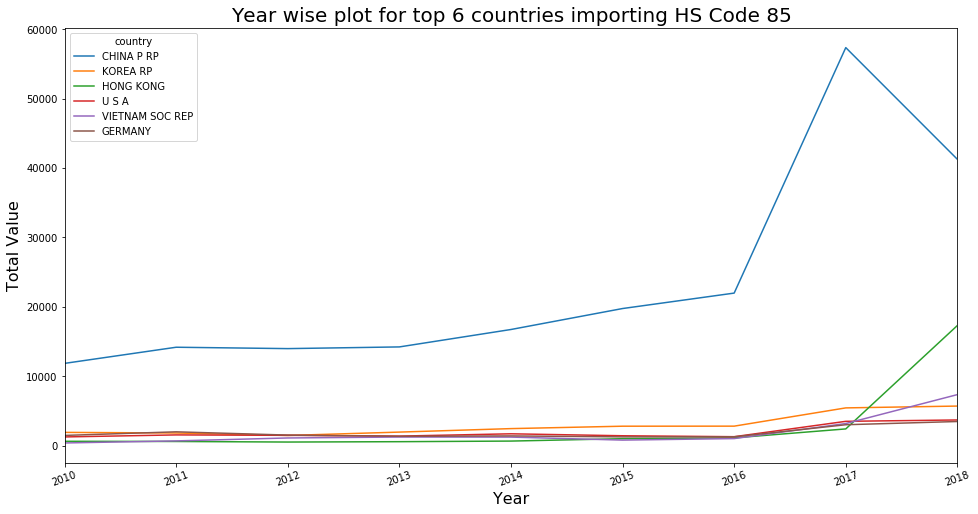

In [15]:
countries = df[df['HSCode']==85].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==85].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 85', fontsize = 20)

### HSCode 84 - NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 84')

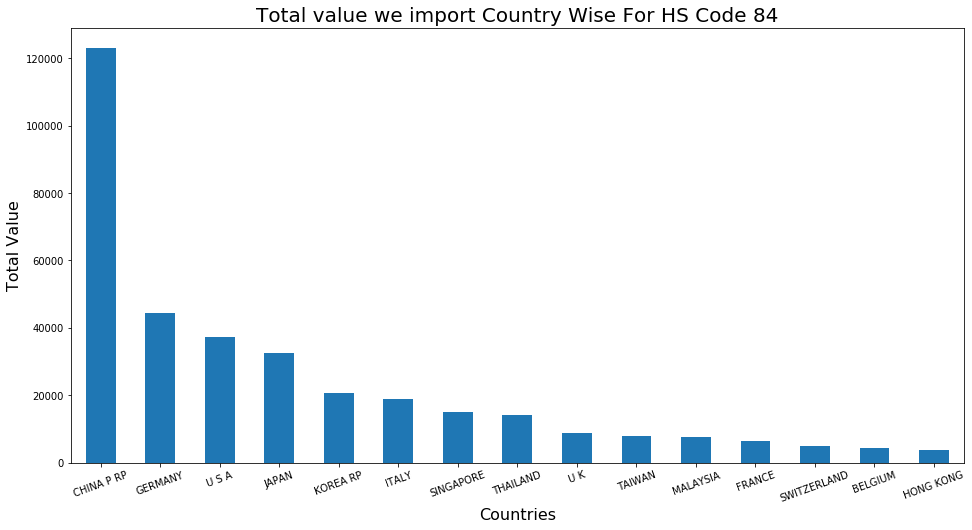

In [16]:
df[df['HSCode']==84].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 84', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 84')

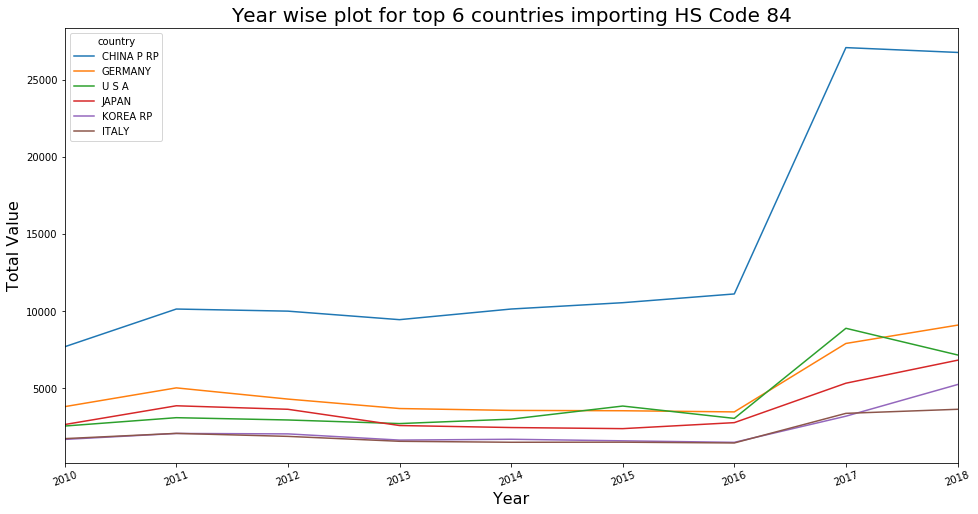

In [17]:
countries = df[df['HSCode']==84].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==84].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 84', fontsize = 20)

### HSCode 29 - ORGANIC CHEMICALS

Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 29')

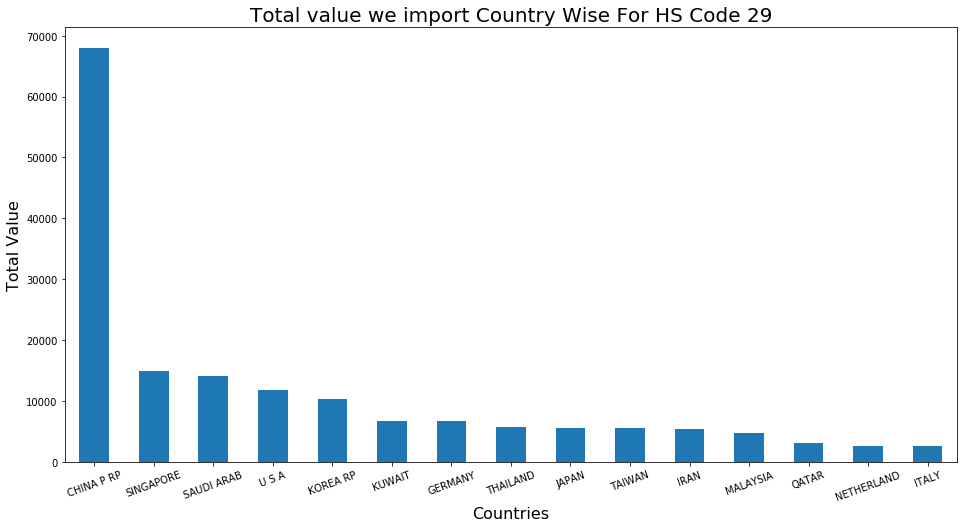

In [18]:
df[df['HSCode']==29].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 29', fontsize = 20)

Text(0.5, 1.0, 'Year wise plot for top 6 countries importing HS Code 29')

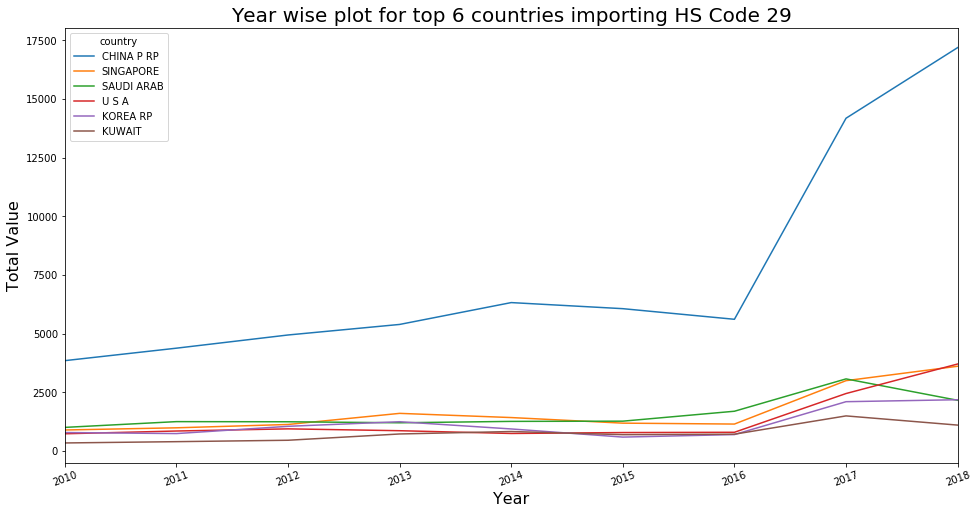

In [19]:
countries = df[df['HSCode']==29].groupby(['country']).sum().nlargest(6, ['value']).index.values
df[df['HSCode']==29].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Year wise plot for top 6 countries importing HS Code 29', fontsize = 20)

# Year Wise import plot

Text(0.5, 1.0, 'Total value we import every year')

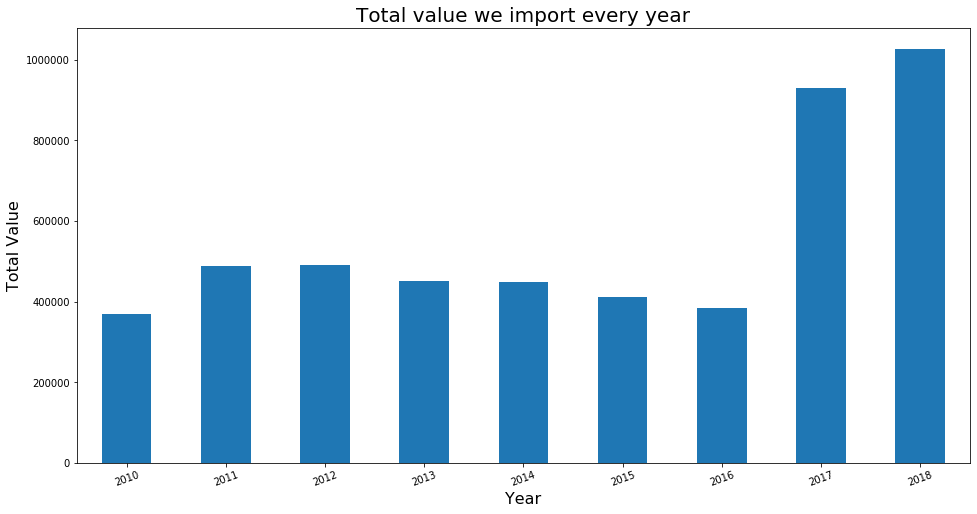

In [20]:
# year wise import plot
df.groupby(['year']).sum()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import every year', fontsize = 20)

# Countries Wise import plot
### Considering only top 15 countries as list of all countries is huge

Text(0.5, 1.0, 'Total value we import Country Wise')

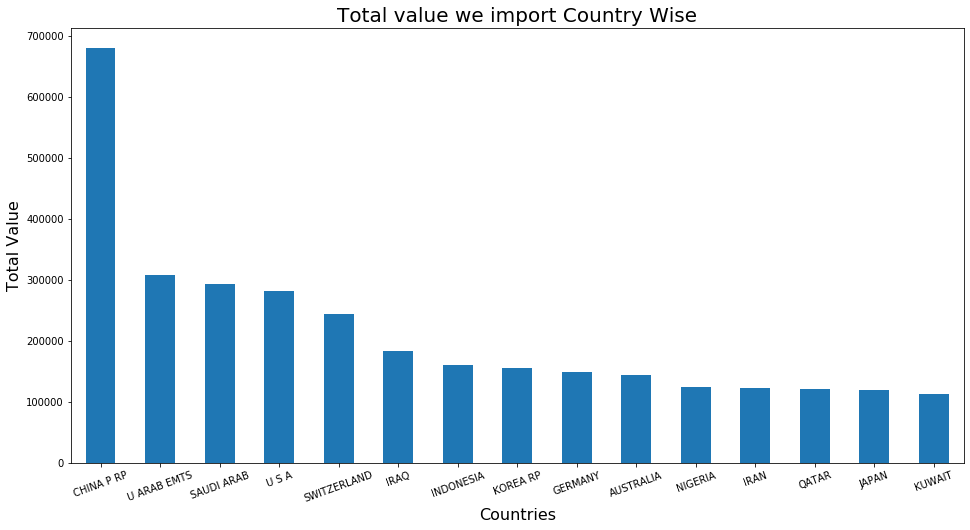

In [21]:
# country wise value plot for highest 15 countries
df.groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise', fontsize = 20)